# Part2 BASIS FUNCTION

1. Generate 50 2D-data points using the following function: y = sin(x<sup>2</sup>+1)

In [1]:
import numpy as np

def syntenic_data():
    x = np.linspace(0, 1, 50)
    y = np.sin(x ** 2 + 1)
    return x, y

x,y = syntenic_data()
x,y

(array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
        0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
        0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
        0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
        0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
        0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
        0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
        0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
        0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
        0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ]),
 array([0.84147098, 0.84169594, 0.84236995, 0.84349036, 0.84505279,
        0.84705107, 0.84947726, 0.85232157, 0.85557242, 0.85921634,
        0.86323797, 0.86762003, 0.87234327, 0.87738641, 0.88272615,
        0.88833707, 0.89419162, 0.90026007, 0.90651044, 0.9129085 ,
        0.91941768, 0.92599909, 0.93261141, 0.

2. Add Gaussian random noise to the data

In [2]:
def add_noise(y, mean, std, N):
    noise_data = y + np.random.normal(mean,std,N)
    return noise_data

mean_data, sigma_data = 0, 0.04
noise_y = add_noise(y, mean_data, sigma_data, 50)
noise_y

array([0.82335376, 0.85449926, 0.86876706, 0.85190328, 0.78994794,
       0.79422942, 0.75538859, 0.82272007, 0.93095429, 0.81553875,
       0.83546405, 0.87829938, 0.84449368, 0.88109694, 0.84587748,
       0.92469343, 0.96243576, 0.97578826, 0.95299323, 0.82586699,
       0.86756524, 0.90558958, 0.92992815, 0.91852295, 0.97202159,
       0.88144495, 0.95407987, 0.91507114, 1.02321042, 0.950188  ,
       0.98571892, 0.93616679, 1.02321319, 1.01975622, 0.91027466,
       1.05137556, 0.93099678, 1.03434202, 1.03524778, 1.03057872,
       0.94121356, 1.05912752, 0.98765485, 0.92422398, 1.0036448 ,
       0.93127552, 0.97020651, 0.91806561, 0.84262041, 0.97474425])

3. Fit the generated noisy data using the MLE that employs the Gaussian basis functions as discussed in class.

In [3]:
class MLE():
    def __init__(self, M, Mu=None, s=None, function=None):  
        self.M = M
        self.function = function
        self.w = None 
        self.Phi = None
        self.Mu = Mu     # Gaussian Mu
        self.s = s        # Gaussion s
        

    def fit(self, x, t):
        if self.function == 'Gaussian':
            self.Phi = self.MLE_Gaussian(x)
        elif self.function == 'Sigmoid':
            self.Phi = self.MLE_Sigmod(x)
        self.w = np.linalg.inv(self.Phi.T @ self.Phi) @ self.Phi.T @ t   # w formula

    def predict(self, x):
        if self.function == 'Gaussian':
            Phi = self.MLE_Gaussian(x)
        elif self.function == 'Sigmoid':
            Phi = self.MLE_Sigmod(x)
        y_predict = Phi @ self.w
        return y_predict

    def MLE_Gaussian(self, x):   
        # When MLE employs the Gaussian basis functions, compute the Phi matrix 
        N = len(x)   # number of x
        Phi = np.ones((N, self.M))
        for n in range(N):
            for m in range(1, self.M):
                Phi[n][m] = np.exp((-(x[n]-self.Mu[m])**2) / (2*self.s**2))     # Gaussian formula
        return Phi

    def MLE_Sigmod(self, x):
        # When MLE employs the sigmoid basis functions, compute the Phi matrix
        N = len(x)
        Phi = np.ones((N, self.M))
        for n in range(N):
            for m in range(1, self.M):
                Phi[n][m] = 1.0 / (1.0 + np.exp(-(x[n]-self.Mu[m])/ self.s ))
        return Phi


In [4]:
M = 10
Mu = np.linspace(0, 1, M)
s = 2/M
model = MLE(M = 10, Mu=Mu, s=s, function='Gaussian')
model.fit(x, noise_y)
y_predict = model.predict(x)

In [5]:
import matplotlib.pyplot as plt

curve_x = np.linspace(0, 1, 20)
curve_y = np.sin(curve_x ** 2 + 1)

class MLE_plotter():
    def __init__(self, curvex, curvey, x, noise_y):
        self.curve_x = curvex
        self.curve_y = curvey
        self.x = x
        self.noise_y = noise_y

    
    def MLE_show(self, y_predict, M=None, d=None, s=None):
        plt.figure(figsize=(5,3))
        plt.scatter(self.curve_x, self.curve_y, color='red')
        plt.plot(self.curve_x, self.curve_y, color='red')
        plt.scatter(self.x, self.noise_y, color='green')
        plt.plot(x, y_predict, color='blue')
        
        title_parts = []
        if M:
            title_parts.append(f'M={M}')
        if d:
            title_parts.append(f'd={d}')
        if s:
            title_parts.append(f's={s}')
        title = ','.join(title_parts)
        plt.title(title)
        plt.show()
        


        

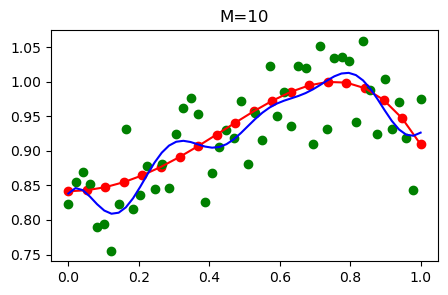

In [6]:
plotter = MLE_plotter(curve_x, curve_y, x, noise_y)
plotter.MLE_show(y_predict, M) 

4. Show your results for different values of M that generate overfitting and underfitting curves.

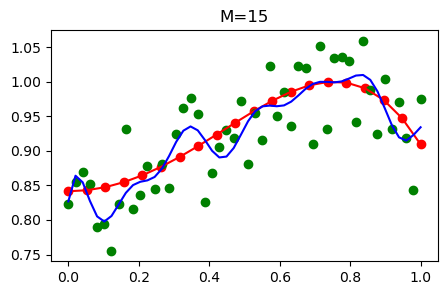

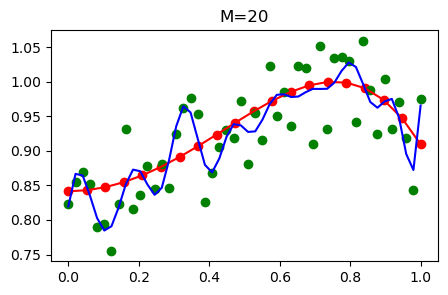

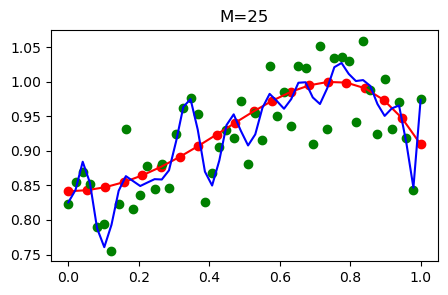

In [7]:
# Overfitting:
for m in [15, 20, 25]:
    Mu = np.linspace(0, 1, m)
    s = 2/m
    model = MLE(M=m, Mu=Mu, s=s, function='Gaussian')
    model.fit(x, noise_y)
    y_predict = model.predict(x)
    plotter.MLE_show(y_predict=y_predict, M=m)

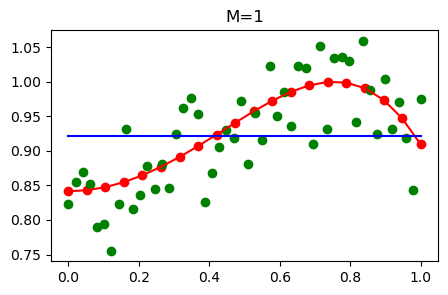

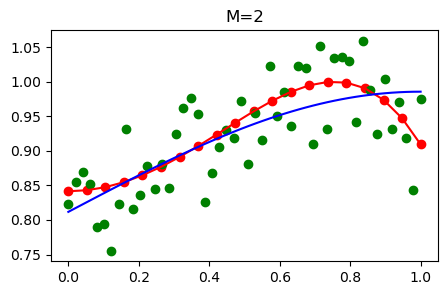

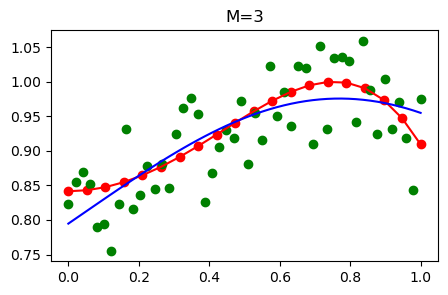

In [8]:
# Underfitting:
for m in [1, 2, 3]:
    Mu = np.linspace(0, 1, m)
    s = 2/m
    model = MLE(M=m, Mu=Mu, s=s, function='Gaussian')
    model.fit(x, noise_y)
    y_predict = model.predict(x)
    plotter.MLE_show(y_predict=y_predict, M=m)

5. Change the basis functions to the sigmoid basis functions, and show the results for different values of M that generate overfitting and underfitting curves.

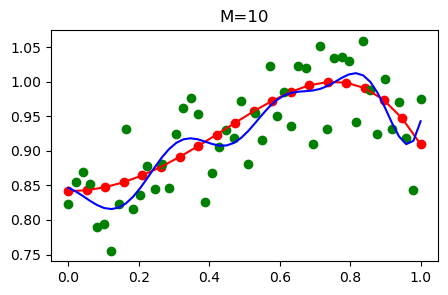

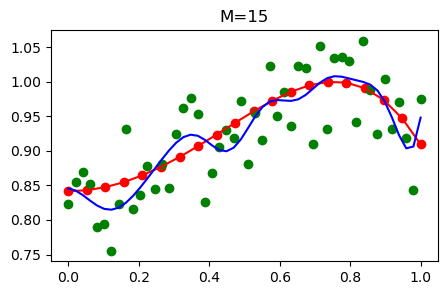

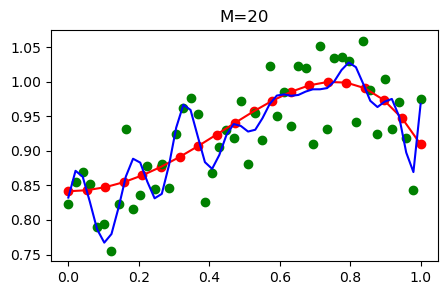

In [9]:
# The sigmoid basis function has been completed in MLE class.
# Overfitting:
for m in [10, 15, 20]:
    Mu = np.linspace(0, 1, m)
    s = 2/m
    model = MLE(M=m, Mu=Mu, s=s, function='Sigmoid')
    model.fit(x, noise_y)
    y_predict = model.predict(x)
    plotter.MLE_show(y_predict=y_predict, M=m)


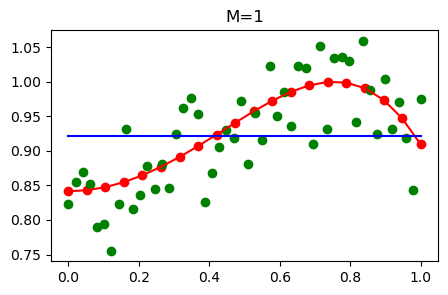

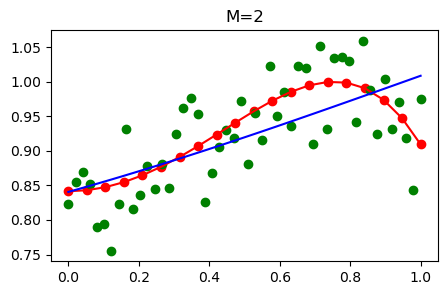

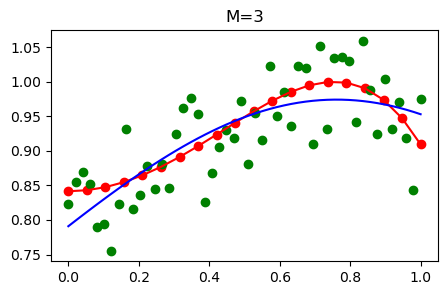

In [10]:
# Underfitting:

for m in [1, 2, 3]:
    Mu = np.linspace(0, 1, m)
    s = 2/m
    model = MLE(M=m, Mu=Mu, s=s, function='Sigmoid')
    model.fit(x, noise_y)
    y_predict = model.predict(x)
    plotter.MLE_show(y_predict=y_predict, M=m)

6. Change the original curve function to y = 0.4345x<sup>3</sup>-5.607x<sup>2</sup>+16.78x-10.61, and use the sigmoid basis function to estimate the best curve fitting from the noisy data.

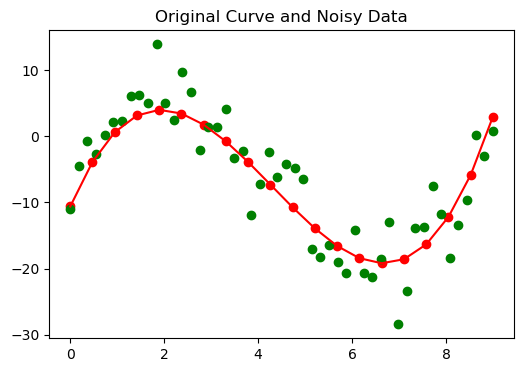

In [11]:
def syntenic_data():
    x = np.linspace(0, 9, 50)
    y = 0.4345 * x**3 - 5.607 * x**2 + 16.78 * x - 10.61
    return x, y

x,y = syntenic_data()

def add_noise(y, mean, std, N):
    noise_data = y + np.random.normal(mean,std,N)
    return noise_data

mean_data, sigma_data = 0, 4
noise_y = add_noise(y, mean_data, sigma_data, 50)

import matplotlib.pyplot as plt

#生成从小到大的间隔相等的点来绘制圆滑的曲线
curve_x = np.linspace(0, 9, 20)
curve_y = 0.4345 * curve_x**3 - 5.607 * curve_x**2 + 16.78 * curve_x - 10.61

plt.figure(figsize=(6,4))
plt.scatter(curve_x, curve_y, color='red')
plt.plot(curve_x, curve_y, color='red')
plt.scatter(x, noise_y, color='green')
plt.title('Original Curve and Noisy Data')
plt.show()


Best curve:


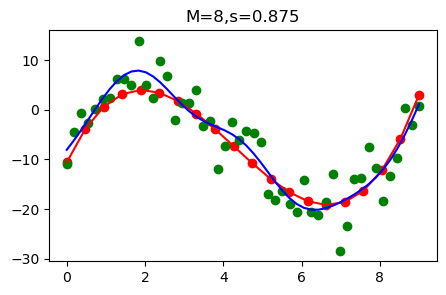

min_error: 147.13801274388504


In [12]:
def evaluate(y, y_predict):
    error = 0
    for i in range(len(y)):
        error += abs(y_predict[i] - y[i])
    return error

min_error = 0
best_M = 0
best_s = 0
initial = True

M = [2, 3, 4, 5, 6, 7, 8]
for m in M:
    Mu = np.linspace(0, 9, m)
    for n in range(1,50):
        s = n * 1/m
        model = MLE(M=m, Mu=Mu, s=s, function='Sigmoid')
        model.fit(x, noise_y)
        y_predict = model.predict(x)
        error = evaluate(noise_y, y_predict)
        if initial:
            min_error = error
            best_M = m
            best_s = s
            initial = False
        if error < min_error:
            min_error = error
            best_M = m
            best_s = s

M = best_M
Mu = np.linspace(0, 9, M)
s = best_s
model = MLE(M=M, Mu=Mu, s=s, function='Sigmoid')
model.fit(x, noise_y)
y_predict = model.predict(x)

plotter = MLE_plotter(curve_x, curve_y, x, noise_y)
print('Best curve:')
plotter.MLE_show(y_predict, M =M, s=s)
print('min_error:', min_error)

7. Experiment with different parameters of the Gaussian and sigmoid basis functions, and then show the plot. Also, discuss the advantages of these basis functions over polynomial functions.

### Gaussian

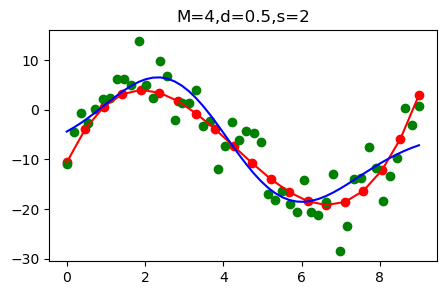

error: 180.05105159635906


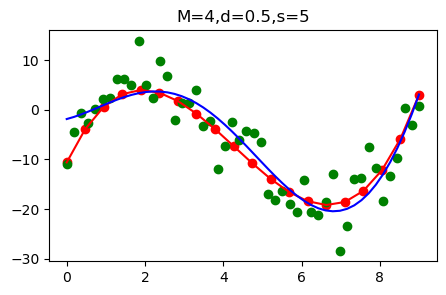

error: 179.8776340592934


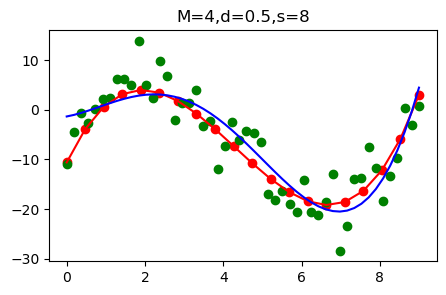

error: 187.01587529743043


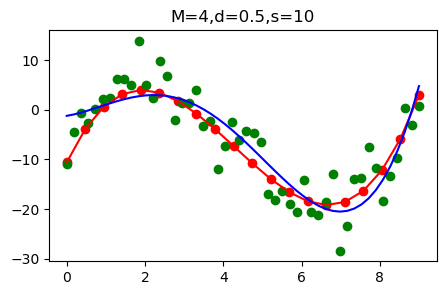

error: 188.75523578028802


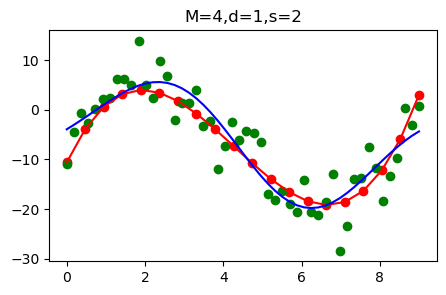

error: 170.49003978158544


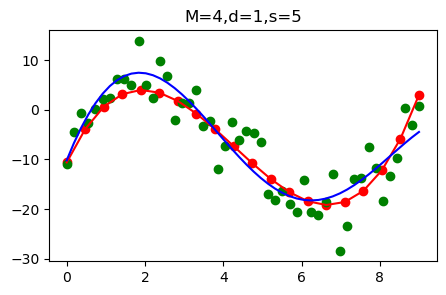

error: 165.19877358784035


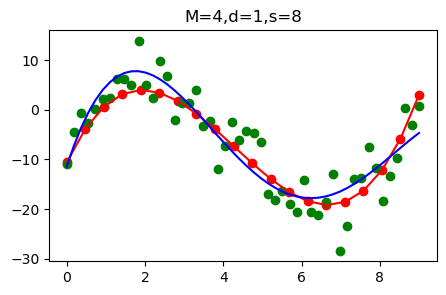

error: 171.04890656591564


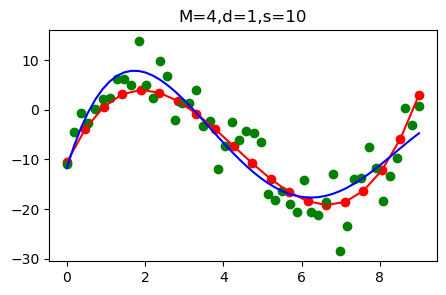

error: 173.1832531864341


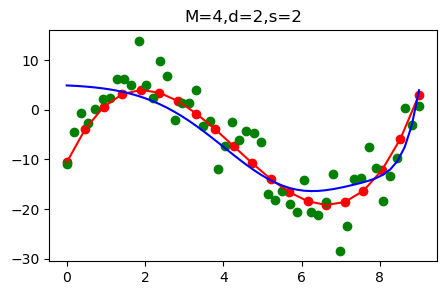

error: 221.31297387000606


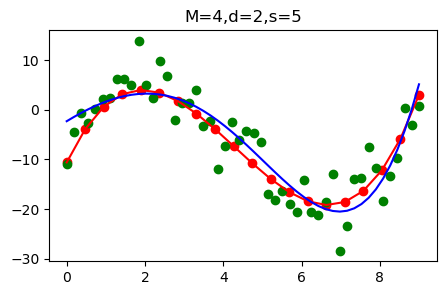

error: 183.06220922879248


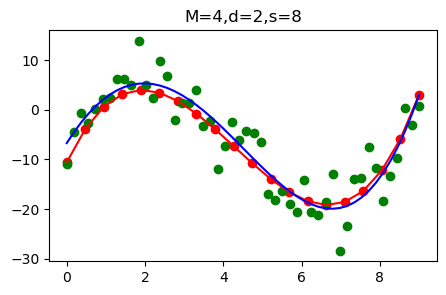

error: 161.5548368865191


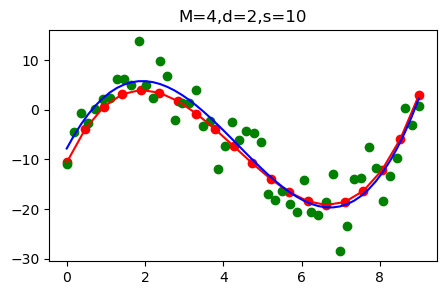

error: 159.54769936491485


In [17]:
# Gaussian
# when M=3, change mu and s
M = 4
D = [0.5, 1, 2]
S = [2, 5, 8, 10]
Mu_average = np.linspace(0, 9, M)
plotter = MLE_plotter(curve_x, curve_y, x, noise_y)
for d in D:
    for s in S:
        Mu = d * Mu_average
        model = MLE(M, Mu=Mu, s=s, function='Gaussian')
        model.fit(x, noise_y)
        y_predict = model.predict(x)
        error = evaluate(noise_y, y_predict)
        plotter.MLE_show(y_predict, M, d=d, s=s)  
        print('error:', error)      
        

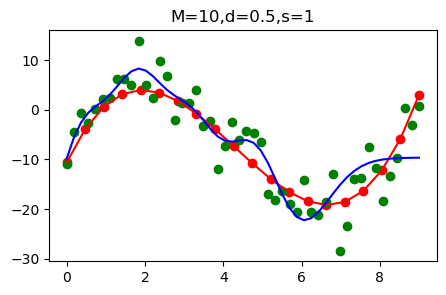

error: 160.18337546971594


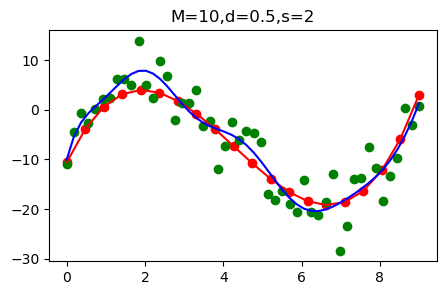

error: 142.81868954687323


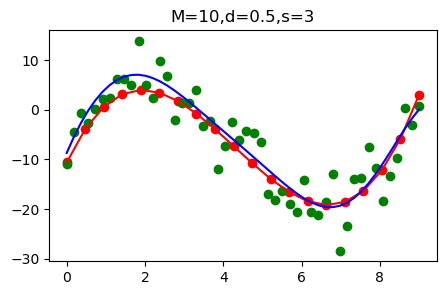

error: 161.63196148758797


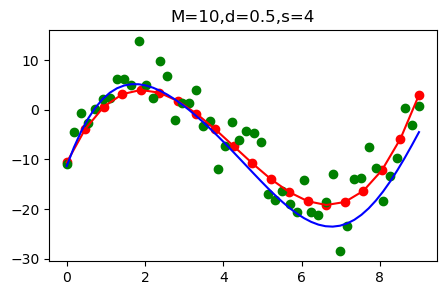

error: 183.66086278538873


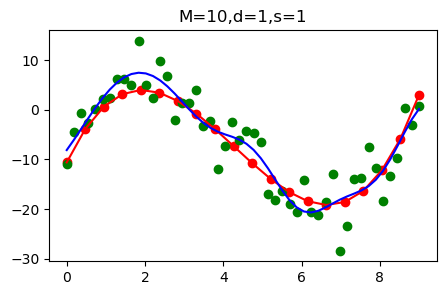

error: 144.81513980512338


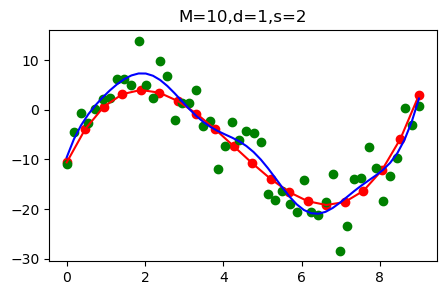

error: 144.05548816234028


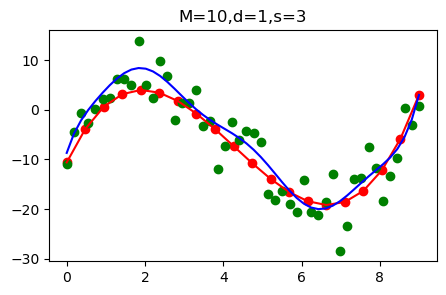

error: 152.8910438888328


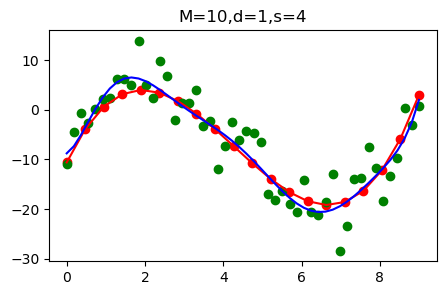

error: 151.16171693242603


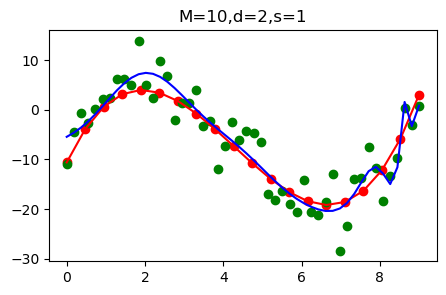

error: 140.935106782681


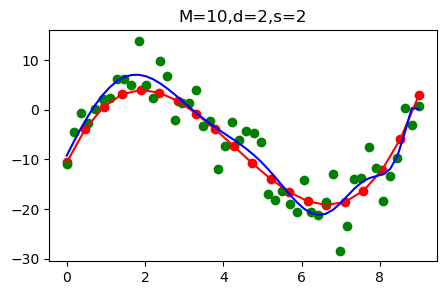

error: 146.041069085823


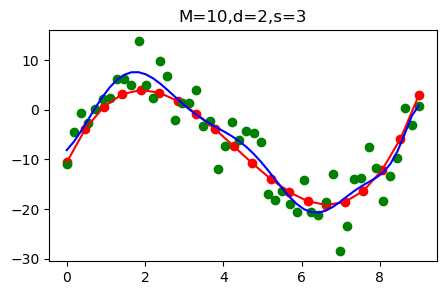

error: 146.05103903019145


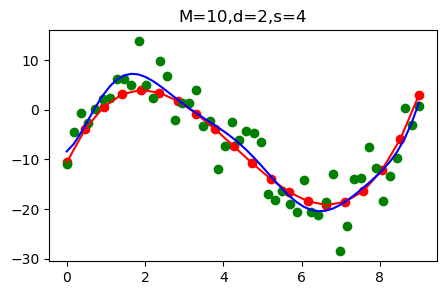

error: 150.0041768147266


In [23]:
# when M=10, change mu and s
M = 10
D = [0.5, 1, 2]
S = [1, 2, 3, 4]
Mu_average = np.linspace(0, 9, M)
plotter = MLE_plotter(curve_x, curve_y, x, noise_y)
for d in D:
    for s in S:
        Mu = d * Mu_average
        model = MLE(M, Mu=Mu, s=s, function='Gaussian')
        model.fit(x, noise_y)
        y_predict = model.predict(x)
        error = evaluate(noise_y, y_predict)
        plotter.MLE_show(y_predict, M, d=d, s=s)  
        print('error:', error)  

### Sigmoid

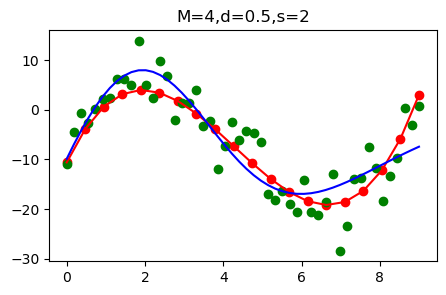

error: 176.73125635561055


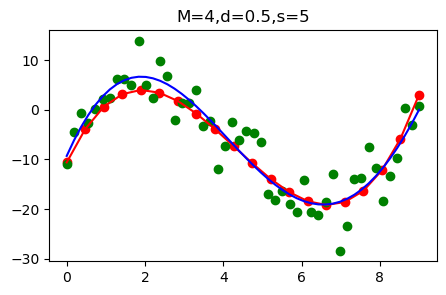

error: 156.01022275990164


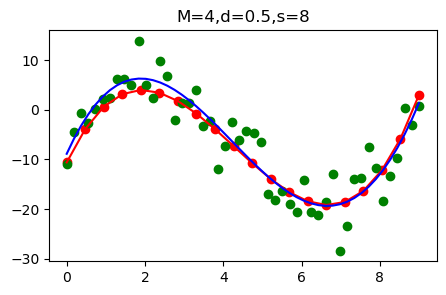

error: 157.4099072524895


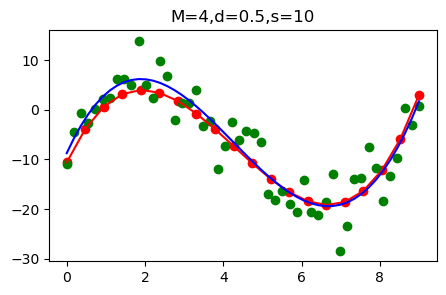

error: 158.155946021221


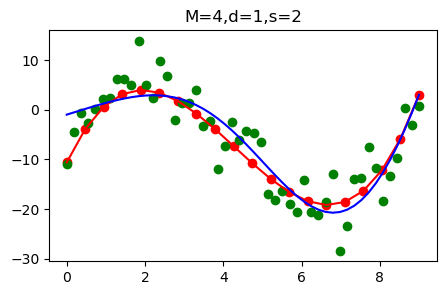

error: 184.2464450634041


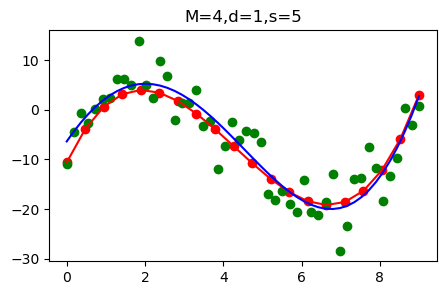

error: 161.8888602253471


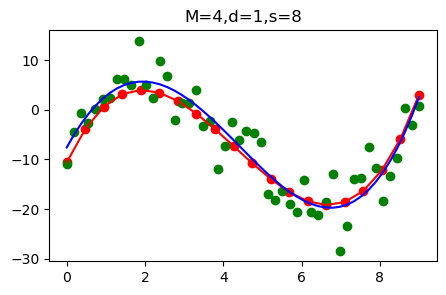

error: 159.97670687423843


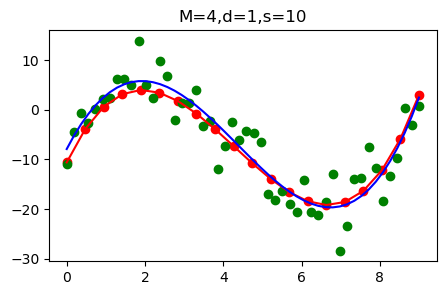

error: 159.828173132153


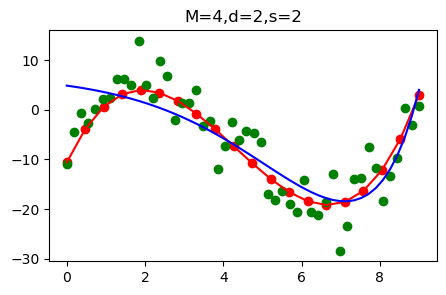

error: 224.87381454679203


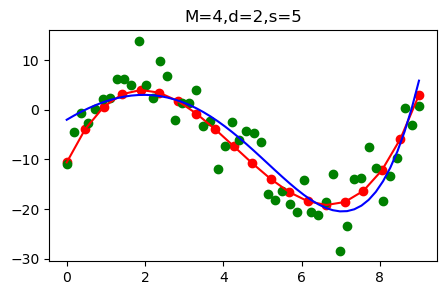

error: 186.99569763161193


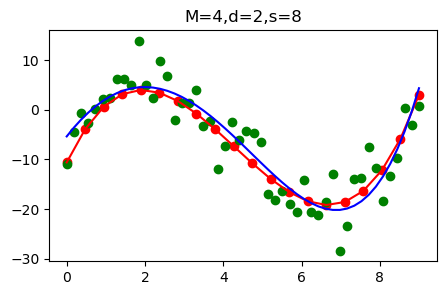

error: 169.25708931559873


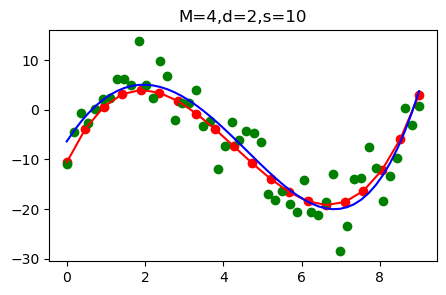

error: 164.29029573302776


In [25]:
# when M=4, change mu and s
M = 4
D = [0.5, 1, 2]
S = [2, 5, 8, 10]
Mu_average = np.linspace(0, 9, M)
plotter = MLE_plotter(curve_x, curve_y, x, noise_y)
for d in D:
    for s in S:
        Mu = d * Mu_average
        model = MLE(M, Mu=Mu, s=s, function='Sigmoid')
        model.fit(x, noise_y)
        y_predict = model.predict(x)
        error = evaluate(noise_y, y_predict)
        plotter.MLE_show(y_predict, M, d=d, s=s)  
        print('error:', error) 

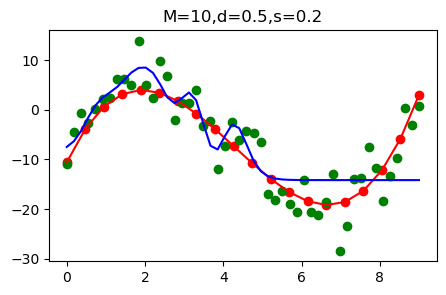

error: 200.09642561197597


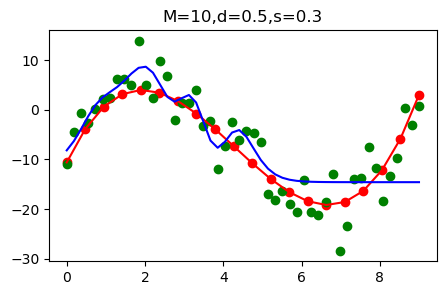

error: 198.16085326037876


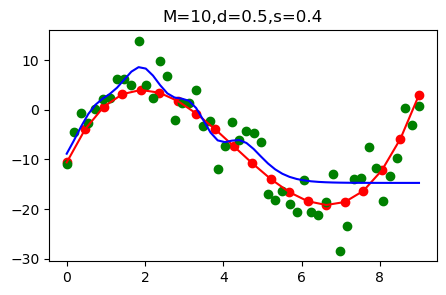

error: 200.93799554281404


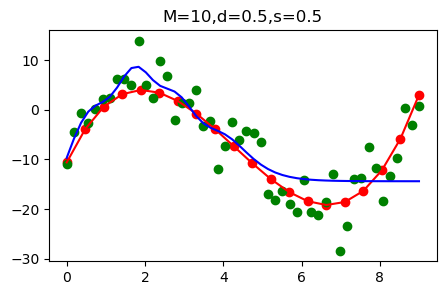

error: 206.23054599894917


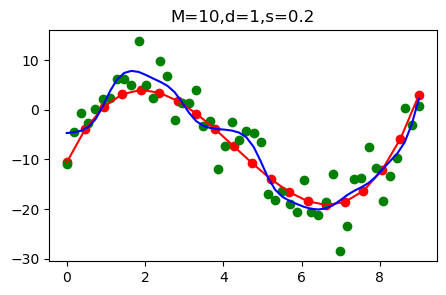

error: 147.99824471676166


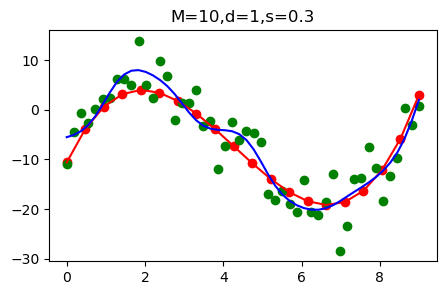

error: 146.67449629480336


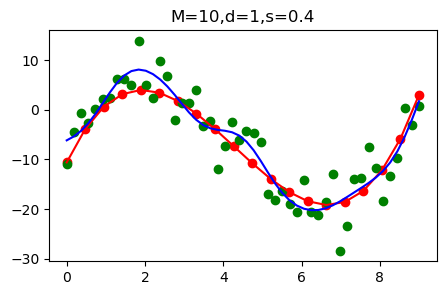

error: 146.05089560178916


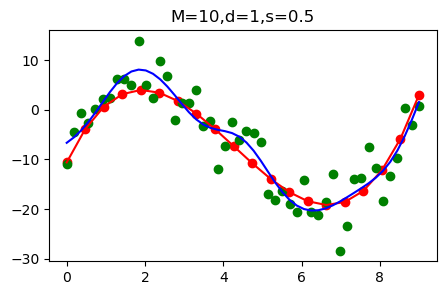

error: 145.7310731176203


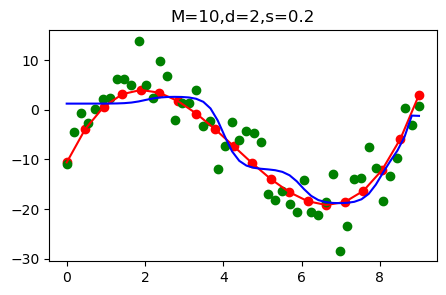

error: 221.02934153230674


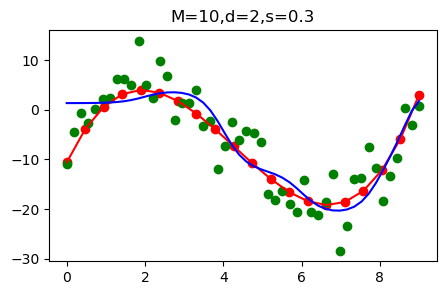

error: 211.7536969675384


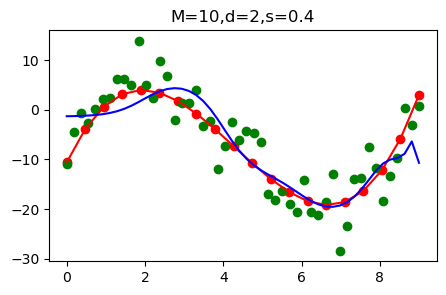

error: 215.13124512971532


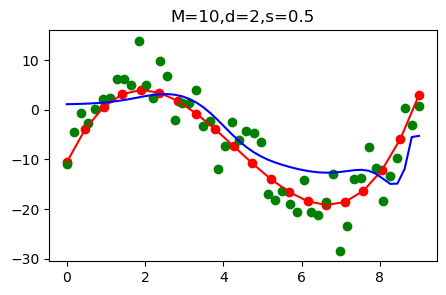

error: 233.10803089755447


In [31]:
# when M=10, change mu and s
M = 10
D = [0.5, 1, 2]
S = [0.2, 0.3, 0.4, 0.5]
Mu_average = np.linspace(0, 9, M)
plotter = MLE_plotter(curve_x, curve_y, x, noise_y)
for d in D:
    for s in S:
        Mu = d * Mu_average
        model = MLE(M, Mu=Mu, s=s, function='Sigmoid')
        model.fit(x, noise_y)
        y_predict = model.predict(x)
        error = evaluate(noise_y, y_predict)
        plotter.MLE_show(y_predict, M, d=d, s=s)  
        print('error:', error) 

### The advantages of these basis functions over polynomial functions:


- Adaptability and Flexibility: 
  - Gaussian and Sigmoid basis functions offer greater flexibility in terms of their function shapes, making them better suited for various types of data. Polynomial functions have fixed shapes, whereas Gaussian and Sigmoid functions can be fine-tuned by adjusting parameters, making them more suitable for data with nonlinear features.
- Control over Overfitting and Underfitting:
  - Parameters of Gaussian and Sigmoid basis functions can be adjusted to control the complexity of the fit. This means that overfitting and underfitting issues can be better addressed by increasing or decreasing the number and range of parameters. Compared to polynomial fitting, they offer more flexibility, making model selection easier.
- Reduced Numerical Instability: 
  - When using polynomial functions, if x has a high order, it can lead to numerical instability, especially when x itself is a large number. However, when using Gaussian and Sigmoid basis functions, y is represented as the sum of M curves at x, and each yi can be relatively small. This ensures that numerical problems are mitigated. This advantage guarantees numerical stability even when dealing with data featuring high-order or large numerical values